### Importing Libraries ###

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [150]:
df = pd.read_csv("loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [151]:
df.shape

(614, 13)

In [152]:
df.Loan_ID.value_counts(dropna=False)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

In [153]:
df.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

/var/folders/0h/wgsyv0_s19n8zzcbbwwy6d_w0000gn/T/ipykernel_63387/1569926228.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data = df, palette="hls")


<Axes: xlabel='Gender', ylabel='count'>

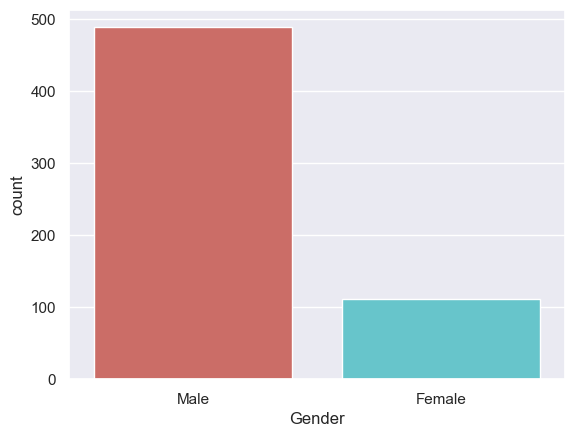

In [154]:
sns.countplot(x="Gender", data = df, palette="hls")

<Axes: xlabel='LoanAmount', ylabel='Count'>

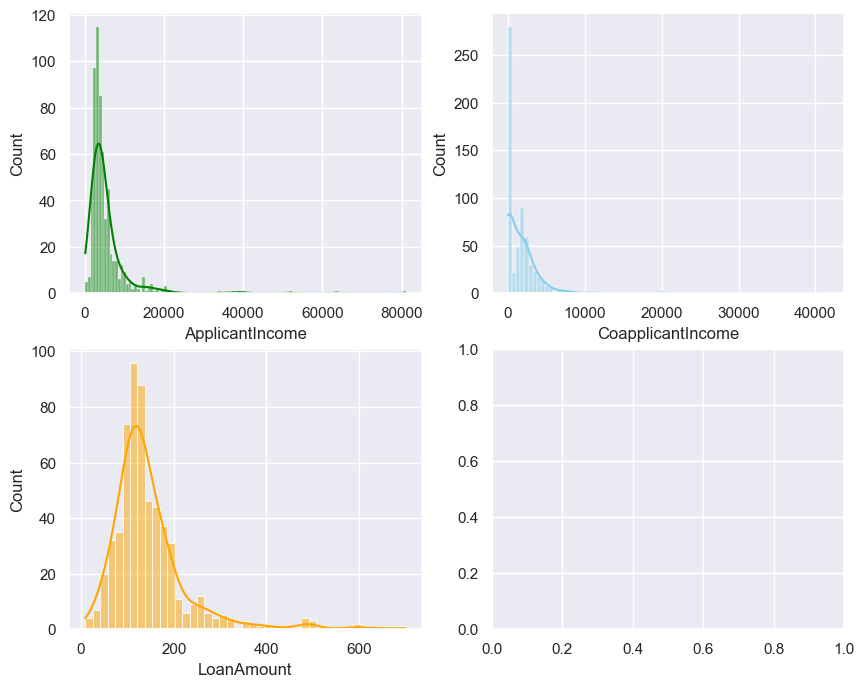

In [155]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')

In [156]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

<Axes: xlabel='LoanAmount', ylabel='Count'>

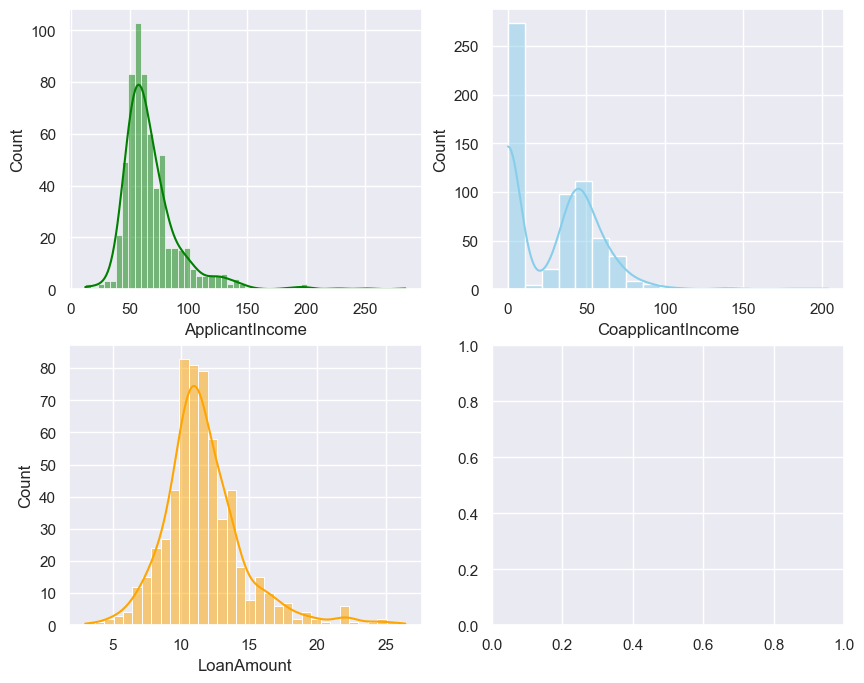

In [157]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')

In [158]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [159]:
df['Gender'].fillna(df["Gender"].mode()[0],inplace = True)
df['Dependents'].fillna(df["Dependents"].mode()[0],inplace = True)
df['Self_Employed'].fillna(df["Self_Employed"].mode()[0],inplace = True)
df['LoanAmount'].fillna(df["LoanAmount"].mode()[0],inplace = True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df['Credit_History'].fillna(df["Credit_History"].mode()[0],inplace = True)
df['Married'].fillna(df["Married"].mode()[0],inplace = True)

/var/folders/0h/wgsyv0_s19n8zzcbbwwy6d_w0000gn/T/ipykernel_63387/3249540045.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df["Gender"].mode()[0],inplace = True)
/var/folders/0h/wgsyv0_s19n8zzcbbwwy6d_w0000gn/T/ipykernel_63387/3249540045.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [160]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [166]:
y = df['Loan_Status']                  # keep original target
X = df.drop(columns=['Loan_Status', 'Loan_ID'], errors='ignore')  # drop ID if present

# One-hot encode features; drop_first avoids dummy trap automatically
X = pd.get_dummies(X, drop_first=True)

# (Optional) Convert y to 0/1 if it's 'Y'/'N'
y = y.map({'Y': 1, 'N': 0}).astype('Int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
LRmodel = LogisticRegression (max_iter=500)
LRmodel.fit(X_train,y_train)

/Users/veerjain/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [167]:
y_pred = LRmodel.predict(X_test)

In [168]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.827027027027027
Confusion Matrix:
 [[ 21  30]
 [  2 132]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



In [171]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [172]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,76.478755,0.000000,10.954451,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,53.851648,0.000000,8.426150,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,64.078077,0.000000,6.324555,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,89.844310,15.491933,15.905974,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,87.080423,0.000000,13.674794,360.0,1.0,Urban,Y


In [175]:
new_applicant = [[70,12,20,360,1,1,1,0,0,0,0,0,1,0]]
prediction = LRmodel.predict(new_applicant)
prediction

/Users/veerjain/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])

In [177]:
dt_model = DecisionTreeClassifier(random_state=0,
    max_depth=4,            # start small to avoid overfitting
    min_samples_leaf=10,    # regularization
    class_weight='balanced')
dt_predicition = dt_model.fit(X_train,y_train)

In [180]:
dt_predicition = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.827027027027027
Confusion Matrix:
 [[ 21  30]
 [  2 132]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

